In [37]:
import pandas as pd
import numpy as np

from conf_ensemble_library import ConfEnsembleLibrary
from ccdc_rdkit_connector import CcdcRdkitConnector
from ccdc.descriptors import MolecularDescriptors
from rdkit.Chem.rdMolDescriptors import CalcNumRotatableBonds

In [12]:
crc = CcdcRdkitConnector()

In [5]:
cel = ConfEnsembleLibrary()
cel.load_metadata()
cel.load()

100%|███████████████████████████████████| 14385/14385 [00:11<00:00, 1291.35it/s]


In [20]:
smiles_df = pd.read_csv('data/smiles_df.csv')
included_smiles = smiles_df[smiles_df['included']]['smiles'].unique()

In [29]:
ces = {}
for smiles, ce in cel.get_unique_molecules() :
    if ce.mol.GetNumConformers() > 1 and smiles in included_smiles :
        ces[smiles] = ce

In [30]:
len(ces)

1338

In [25]:
mol.GetNumAtoms()

14

In [38]:
rmsds = []
n_rot_bonds = []
for smiles, ce in ces.items() :
    mol = ce.mol
    n_rot_bond = CalcNumRotatableBonds(mol)
    confs = [conf for conf in mol.GetConformers()]
    for i, conf1 in enumerate(confs) :
        mol1 = crc.rdkit_conf_to_ccdc_mol(mol, conf1.GetId())
        for j, conf2 in enumerate(confs[i+1:]) :
            mol2 = crc.rdkit_conf_to_ccdc_mol(mol, conf2.GetId())
            rmsd = MolecularDescriptors.rmsd(mol1, mol2, overlay=True)
            rmsds.append(rmsd)
            n_rot_bonds.append(n_rot_bond)

<AxesSubplot:ylabel='Count'>

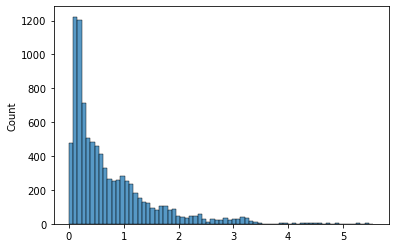

In [33]:
import seaborn as sns
sns.histplot(x=rmsds)

<AxesSubplot:>

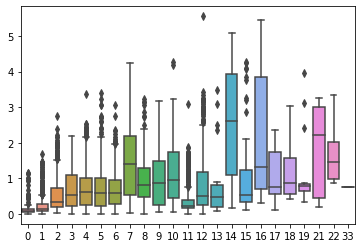

In [39]:
sns.boxplot(x=n_rot_bonds, y=rmsds)

In [35]:
np.sum(np.array(rmsds) < 1)

6794

In [36]:
np.sum(np.array(rmsds) > 1)

2333